### grp

# Course: _Machine Learning with The Experts_:
1.  raw data
2.  nlp models
3.  pipeline models
4.  real world data science

## _1. Exploring The Raw Data:_
-  dataset:
    -  budget data:
        -  line-item => algebra books for 8th grade students
        -  labels => textbooks, math, middle school, etc
-  classification metrics:
    -  log loss:
        -  loss function
        -  measurement of error for classification supervised learning
        -  goal is to minimize the error

#### load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

raw_data = pd.read_csv('raw_data/school_budget_ds_train.csv', index_col=0)
raw_data.head()

,Function,Use,Sharing,Reporting,Student_Type,Position_Type,Object_Type,Pre_K,Operating_Status,Object_Description,...,Sub_Object_Description,Location_Description,FTE,Function_Description,Facility_or_Department,Position_Extra,Total,Program_Description,Fund_Description,Text_1
134338,Teacher Compensation,Instruction,School Reported,School,NO_LABEL,Teacher,NO_LABEL,NO_LABEL,PreK-12 Operating,NaN,...,NaN,NaN,1.0,NaN,NaN,KINDERGARTEN,50471.810,KINDERGARTEN,General Fund,NaN
206341,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,CONTRACTOR SERVICES,...,NaN,NaN,NaN,RGN GOB,NaN,UNDESIGNATED,3477.860,BUILDING IMPROVEMENT SERVICES,NaN,BUILDING IMPROVEMENT SERVICES
326408,Teacher Compensation,Instruction,School Reported,School,Unspecified,Teacher,Base Salary/Compensation,Non PreK,PreK-12 Operating,Personal Services - Teachers,...,NaN,NaN,1.0,NaN,NaN,TEACHER,62237.130,Instruction - Regular,General Purpose School,NaN
364634,Substitute Compensation,Instruction,School Reported,School,Unspecified,Substitute,Benefits,NO_LABEL,PreK-12 Operating,EMPLOYEE BENEFITS,...,NaN,NaN,NaN,UNALLOC BUDGETS/SCHOOLS,NaN,PROFESSIONAL-INSTRUCTIONAL,22.300,GENERAL MIDDLE/JUNIOR HIGH SCH,NaN,REGULAR INSTRUCTION
47683,Substitute Compensation,Instruction,School Reported,School,Unspecified,Teacher,Substitute Compensation,NO_LABEL,PreK-12 Operating,TEACHER COVERAGE FOR TEACHER,...,NaN,NaN,NaN,NON-PROJECT,NaN,PROFESSIONAL-INSTRUCTIONAL,54.166,GENERAL HIGH SCHOOL EDUCATION,NaN,REGULAR INSTRUCTION


In [2]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400277 entries, 134338 to 415831
Data columns (total 25 columns):
Function                  400277 non-null object
Use                       400277 non-null object
Sharing                   400277 non-null object
Reporting                 400277 non-null object
Student_Type              400277 non-null object
Position_Type             400277 non-null object
Object_Type               400277 non-null object
Pre_K                     400277 non-null object
Operating_Status          400277 non-null object
Object_Description        375493 non-null object
Text_2                    88217 non-null object
SubFund_Description       306855 non-null object
Job_Title_Description     292743 non-null object
Text_3                    109152 non-null object
Text_4                    53746 non-null object
Sub_Object_Description    91603 non-null object
Location_Description      162054 non-null object
FTE                       126071 non-null float64
Func

#### eda

In [3]:
print(raw_data.describe())

                 FTE         Total
count  126071.000000  3.957220e+05
mean        0.426794  1.310586e+04
std         0.573576  3.682254e+05
min        -0.087551 -8.746631e+07
25%         0.000792  7.379770e+01
50%         0.130927  4.612300e+02
75%         1.000000  3.652662e+03
max        46.800000  1.297000e+08


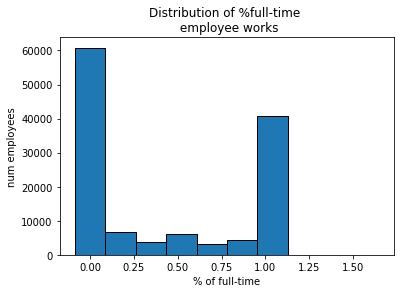

In [4]:
raw_data2 = raw_data[raw_data.FTE < 2] # remove outlier for visual purposes
plt.hist(raw_data2["FTE"].dropna(), edgecolor = 'k')
plt.title('Distribution of %full-time \n employee works')
plt.xlabel('% of full-time')
plt.ylabel('num employees')
plt.show()

#### data types

In [5]:
raw_data.dtypes

Function                   object
Use                        object
Sharing                    object
Reporting                  object
Student_Type               object
Position_Type              object
Object_Type                object
Pre_K                      object
Operating_Status           object
Object_Description         object
Text_2                     object
SubFund_Description        object
Job_Title_Description      object
Text_3                     object
Text_4                     object
Sub_Object_Description     object
Location_Description       object
FTE                       float64
Function_Description       object
Facility_or_Department     object
Position_Extra             object
Total                     float64
Program_Description        object
Fund_Description           object
Text_1                     object
dtype: object

#### encode labels as categorical variables

In [6]:
LABELS = ['Function',
 'Use',
 'Sharing',
 'Reporting',
 'Student_Type',
 'Position_Type',
 'Object_Type',
 'Pre_K',
 'Operating_Status']

In [7]:
raw_data[LABELS].dtypes

Function            object
Use                 object
Sharing             object
Reporting           object
Student_Type        object
Position_Type       object
Object_Type         object
Pre_K               object
Operating_Status    object
dtype: object

In [8]:
categorize_label = lambda x: x.astype('category')

# converts raw_data[LABELS] to a categorical type
raw_data[LABELS] = raw_data[LABELS].apply(categorize_label, axis=0)

print(raw_data[LABELS].dtypes)

Function            category
Use                 category
Sharing             category
Reporting           category
Student_Type        category
Position_Type       category
Object_Type         category
Pre_K               category
Operating_Status    category
dtype: object


#### count unique labels

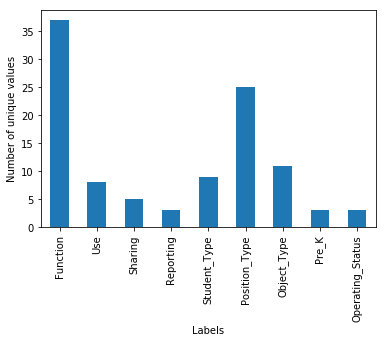

In [9]:
num_unique_labels = raw_data[LABELS].apply(pd.Series.nunique)
num_unique_labels.plot(kind = 'bar')
plt.xlabel('Labels')
plt.ylabel('Number of unique values')
plt.show()

In [10]:
raw_data[LABELS][:5]

,Function,Use,Sharing,Reporting,Student_Type,Position_Type,Object_Type,Pre_K,Operating_Status
134338,Teacher Compensation,Instruction,School Reported,School,NO_LABEL,Teacher,NO_LABEL,NO_LABEL,PreK-12 Operating
206341,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating
326408,Teacher Compensation,Instruction,School Reported,School,Unspecified,Teacher,Base Salary/Compensation,Non PreK,PreK-12 Operating
364634,Substitute Compensation,Instruction,School Reported,School,Unspecified,Substitute,Benefits,NO_LABEL,PreK-12 Operating
47683,Substitute Compensation,Instruction,School Reported,School,Unspecified,Teacher,Substitute Compensation,NO_LABEL,PreK-12 Operating


#### log loss

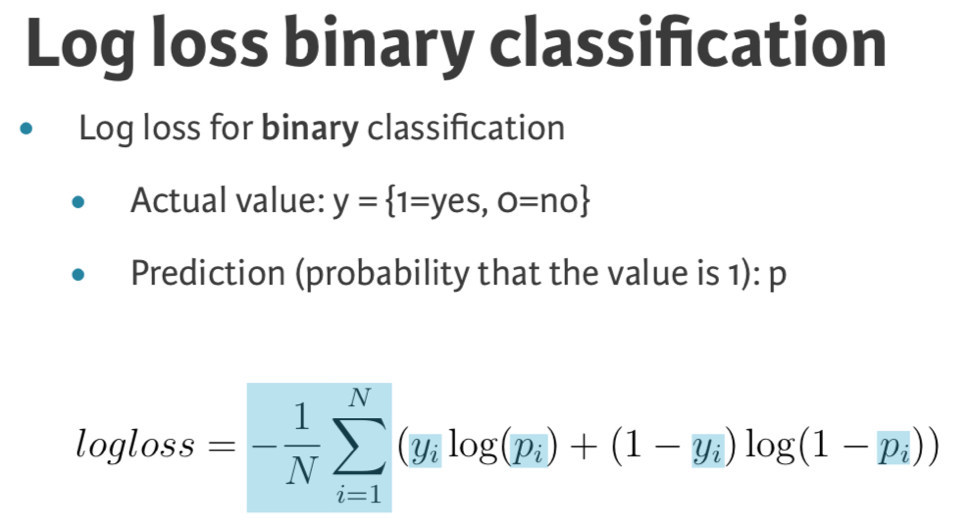

In [11]:
from IPython.display import Image
Image(filename='img/log_loss_binary_class.png', width=375, height=375)

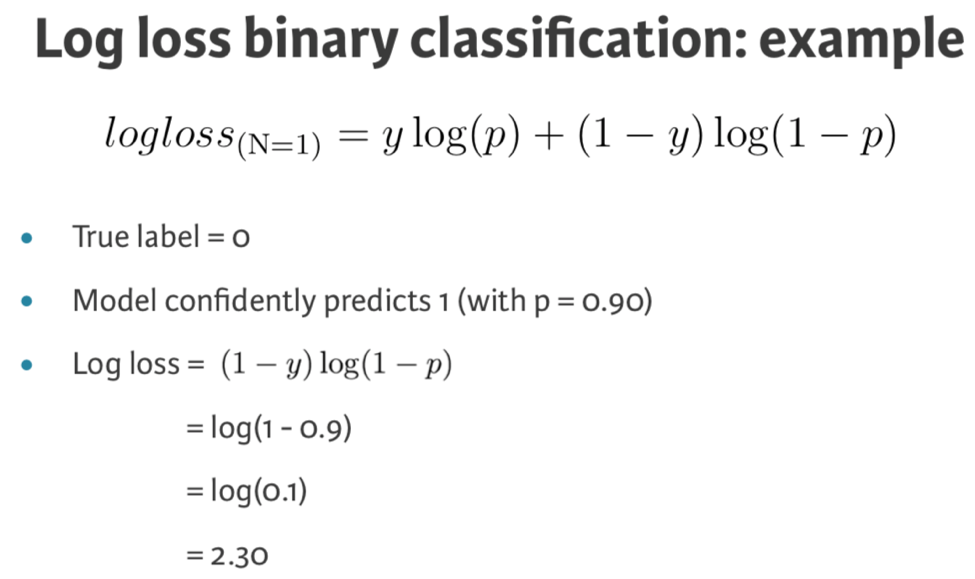

In [12]:
from IPython.display import Image
Image(filename='img/log_loss_binary_class_0.png', width=375, height=375)

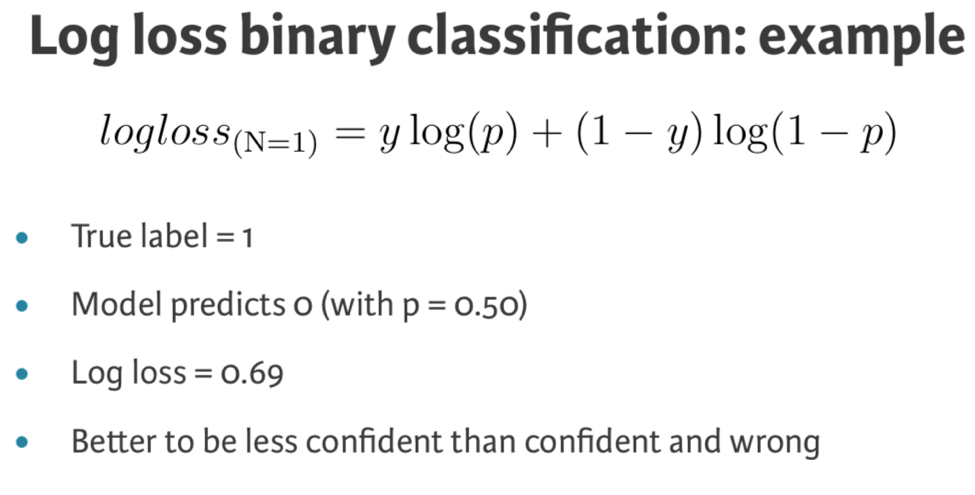

In [13]:
from IPython.display import Image
Image(filename='img/log_loss_binary_class_1.png', width=375, height=375)

In [14]:
def compute_log_loss(predicted, actual, eps=1e-14):
    """ Computes the logarithmic loss between `predicted` and `actual` when these are 1D arrays.
    """
    predicted = np.clip(predicted, eps, 1 - eps)
    
    return -1 * np.mean(actual * np.log(predicted) + (1 - actual) * np.log(1 - predicted))

In [15]:
import inspect
print(inspect.getsource(compute_log_loss))

def compute_log_loss(predicted, actual, eps=1e-14):
    """ Computes the logarithmic loss between `predicted` and `actual` when these are 1D arrays.
    """
    predicted = np.clip(predicted, eps, 1 - eps)
    
    return -1 * np.mean(actual * np.log(predicted) + (1 - actual) * np.log(1 - predicted))



In [16]:
print(compute_log_loss(predicted=0.9, actual=0))
print(compute_log_loss(predicted=0.5, actual=1))
print(compute_log_loss(predicted=0.85, actual=1))
print(compute_log_loss(predicted=0.99, actual=0)) # highest log loss because predicted incorrectly w/ high conf
print(compute_log_loss(predicted=0.51, actual=0))

2.302585092994046
0.6931471805599453
0.16251892949777494
4.605170185988091
0.7133498878774648


## _2. Create a Simple First Model:_
-  splitting multi-class dataset:
    -  use StratifiedShuffleSplit:
        -  **only works with a single target variable**
    -  _create custom func when there are many target variables to **ensure all classes are represented in train and test sets**_
-  train model with multiple classes:
    -  use OneVsRestClassifier:
        -  **treats each column of y independently**
        -  **fits a separate classifier for each of the columns**
-  NLP:
    -  tokenization => splits string into segments
    -  bag of words => counts # of times a token appears
    -  n-grams => token pairings

#### multi class function [_ensures each class appears in train and test set during split_]

In [17]:
def multilabel_sample(y, size=1000, min_count=5, seed=None):
    """ Takes a matrix of binary labels `y` and returns
        the indices for a sample of size `size` if
        `size` > 1 or `size` * len(y) if size =< 1.
        The sample is guaranteed to have > `min_count` of
        each label.
    """
    try:
        if (np.unique(y).astype(int) != np.array([0, 1])).any():
            raise ValueError()
    except (TypeError, ValueError):
        raise ValueError('multilabel_sample only works with binary indicator matrices')

    if (y.sum(axis=0) < min_count).any():
        raise ValueError('Some classes do not have enough examples. Change min_count if necessary.')

    if size <= 1:
        size = np.floor(y.shape[0] * size)

    if y.shape[1] * min_count > size:
        msg = "Size less than number of columns * min_count, returning {} items instead of {}."
        warn(msg.format(y.shape[1] * min_count, size))
        size = y.shape[1] * min_count

    rng = np.random.RandomState(seed if seed is not None else np.random.randint(1))

    if isinstance(y, pd.DataFrame):
        choices = y.index
        y = y.values
    else:
        choices = np.arange(y.shape[0])

    sample_idxs = np.array([], dtype=choices.dtype)

    # first, guarantee > min_count of each label
    for j in range(y.shape[1]):
        label_choices = choices[y[:, j] == 1]
        label_idxs_sampled = rng.choice(label_choices, size=min_count, replace=False)
        sample_idxs = np.concatenate([label_idxs_sampled, sample_idxs])

    sample_idxs = np.unique(sample_idxs)

    # now that we have at least min_count of each, we can just random sample
    sample_count = int(size - sample_idxs.shape[0])

    # get sample_count indices from remaining choices
    remaining_choices = np.setdiff1d(choices, sample_idxs)
    remaining_sampled = rng.choice(remaining_choices,
                                   size=sample_count,
                                   replace=False)

    return np.concatenate([sample_idxs, remaining_sampled])


def multilabel_sample_dataframe(df, labels, size, min_count=5, seed=None):
    """ Takes a dataframe `df` and returns a sample of size `size` where all
        classes in the binary matrix `labels` are represented at
        least `min_count` times.
    """
    idxs = multilabel_sample(labels, size=size, min_count=min_count, seed=seed)
    return df.loc[idxs]


def multilabel_train_test_split(X, Y, size, min_count=5, seed=None):
    """ Takes a features matrix `X` and a label matrix `Y` and
        returns (X_train, X_test, Y_train, Y_test) where all
        classes in Y are represented at least `min_count` times.
    """
    index = Y.index if isinstance(Y, pd.DataFrame) else np.arange(Y.shape[0])

    test_set_idxs = multilabel_sample(Y, size=size, min_count=min_count, seed=seed)
    train_set_idxs = np.setdiff1d(index, test_set_idxs)

    test_set_mask = index.isin(test_set_idxs)
    train_set_mask = ~test_set_mask

    return (X[train_set_mask], X[test_set_mask], Y[train_set_mask], Y[test_set_mask])

#### perform train/test split [_only use numeric variables_]

In [18]:
NUMERIC_COLUMNS = ['FTE', 'Total']

numeric_data_only = raw_data[NUMERIC_COLUMNS].fillna(-1000)

label_dummies = pd.get_dummies(raw_data[LABELS]) # convert labels to dummy variables

X_train, X_test, y_train, y_test = multilabel_train_test_split(numeric_data_only,
                                                               label_dummies,
                                                               size=0.2, 
                                                               seed=123)
print("X_train info:")
print(X_train.info())
print("\nX_test info:")  
print(X_test.info())
print("\ny_train info:")  
print(y_train.info())
print("\ny_test info:")  
print(y_test.info()) 

X_train info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 320222 entries, 134338 to 415831
Data columns (total 2 columns):
FTE      320222 non-null float64
Total    320222 non-null float64
dtypes: float64(2)
memory usage: 7.3 MB
None

X_test info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 80055 entries, 206341 to 72072
Data columns (total 2 columns):
FTE      80055 non-null float64
Total    80055 non-null float64
dtypes: float64(2)
memory usage: 1.8 MB
None

y_train info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 320222 entries, 134338 to 415831
Columns: 104 entries, Function_Aides Compensation to Operating_Status_PreK-12 Operating
dtypes: uint8(104)
memory usage: 34.2 MB
None

y_test info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 80055 entries, 206341 to 72072
Columns: 104 entries, Function_Aides Compensation to Operating_Status_PreK-12 Operating
dtypes: uint8(104)
memory usage: 8.6 MB
None


#### train model [_performs poorly because features are not relevant enough_]

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

clf = OneVsRestClassifier(LogisticRegression(solver='lbfgs'))
clf.fit(X_train, y_train)
print("Accuracy: {}".format(clf.score(X_test, y_test)))

Accuracy: 0.0


#### predict on holdout set

In [20]:
NUMERIC_COLUMNS = ['FTE', 'Total']

clf = OneVsRestClassifier(LogisticRegression(solver='lbfgs'))
clf.fit(X_train, y_train)

holdout = pd.read_csv("raw_data/school_budget_ds_holdout.csv", index_col=0)
predictions = clf.predict_proba(holdout[NUMERIC_COLUMNS].fillna(-1000))

#### write out results to pandas df w/ model score

In [21]:
predictions = clf.predict_proba(holdout[NUMERIC_COLUMNS].fillna(-1000))

prediction_df = pd.DataFrame(columns=pd.get_dummies(raw_data[LABELS]).columns,
                             index=holdout.index,
                             data=predictions)

prediction_df.to_csv('raw_data/predictions.csv')
#score = score_submission(pred_path = 'raw_data/predictions.csv')
#print('Your model, trained with numeric data only, yields logloss score: {}'.format(score))

#### view probabilities df

In [22]:
prediction_df.head()

,Function_Aides Compensation,Function_Career & Academic Counseling,Function_Communications,Function_Curriculum Development,Function_Data Processing & Information Services,Function_Development & Fundraising,Function_Enrichment,Function_Extended Time & Tutoring,Function_Facilities & Maintenance,Function_Facilities Planning,...,Object_Type_Rent/Utilities,Object_Type_Substitute Compensation,Object_Type_Supplies/Materials,Object_Type_Travel & Conferences,Pre_K_NO_LABEL,Pre_K_Non PreK,Pre_K_PreK,Operating_Status_Non-Operating,"Operating_Status_Operating, Not PreK-12",Operating_Status_PreK-12 Operating
0,0.078828,0.008577,0.000525,0.007810,0.006398,0.000356,0.015111,0.013571,0.042062,0.000040,...,0.001940,0.498913,0.001837,0.002064,0.500006,0.499984,0.040795,0.012364,0.024974,0.500078
1,0.035797,0.006477,0.000831,0.023878,0.008927,0.000169,0.032040,0.024386,0.052076,0.000059,...,0.010764,0.012327,0.116143,0.017341,0.831904,0.139304,0.027713,0.170311,0.019935,0.821179
2,0.078829,0.008577,0.000525,0.007810,0.006398,0.000356,0.015111,0.013571,0.042062,0.000040,...,0.001939,0.499534,0.001837,0.002064,0.500003,0.499993,0.040795,0.012364,0.024973,0.500034
3,0.078805,0.008579,0.000525,0.007809,0.006399,0.000356,0.015108,0.013568,0.042061,0.000040,...,0.001940,0.467367,0.001837,0.002064,0.500154,0.499534,0.040790,0.012373,0.024978,0.502315
4,0.035794,0.006478,0.000831,0.023877,0.008927,0.000169,0.032039,0.024385,0.052076,0.000059,...,0.010766,0.011922,0.116142,0.017340,0.831926,0.139246,0.027712,0.170338,0.019936,0.821530


#### sklearn "bag of words":
1.  tokenizes all string
2.  builds a vocabulary
3.  counts occurences of each token in vocabulary

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)' # alpha-numeric pattern

raw_data.Position_Extra.fillna('', inplace=True) # fills missing values in col to empty string
vec_alphanumeric = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC)
vec_alphanumeric.fit(raw_data.Position_Extra)

msg = "There are {} tokens in Position_Extra if we split on non-alpha numeric"
print(msg.format(len(vec_alphanumeric.get_feature_names())))
print(vec_alphanumeric.get_feature_names()[:25]) # first 25 tokens

There are 385 tokens in Position_Extra if we split on non-alpha numeric
['1st', '2nd', '3rd', '4th', '56', '5th', '9th', 'a', 'ab', 'accountability', 'adaptive', 'addit', 'additional', 'adm', 'admin', 'administrative', 'adult', 'aide', 'air', 'alarm', 'alt', 'and', 'any', 'area', 'arra']


#### combine text columns to function

In [24]:
def combine_text_columns(data_frame, to_drop=NUMERIC_COLUMNS + LABELS):
    """ converts all text in each row of data_frame to single vector """
    # drop non-text columns that are in the df
    to_drop = set(to_drop) & set(data_frame.columns.tolist())
    text_data = data_frame.drop(to_drop, axis=1)
    # replace nans with blanks
    text_data.fillna('', inplace=True)  
    # join all text items in a row that have a space in between
    return text_data.apply(lambda x: " ".join(x), axis=1)

#### tokenize all text columns

In [25]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400277 entries, 134338 to 415831
Data columns (total 25 columns):
Function                  400277 non-null category
Use                       400277 non-null category
Sharing                   400277 non-null category
Reporting                 400277 non-null category
Student_Type              400277 non-null category
Position_Type             400277 non-null category
Object_Type               400277 non-null category
Pre_K                     400277 non-null category
Operating_Status          400277 non-null category
Object_Description        375493 non-null object
Text_2                    88217 non-null object
SubFund_Description       306855 non-null object
Job_Title_Description     292743 non-null object
Text_3                    109152 non-null object
Text_4                    53746 non-null object
Sub_Object_Description    91603 non-null object
Location_Description      162054 non-null object
FTE                       126071 non

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

TOKENS_BASIC = '\\S+(?=\\s+)' # split on whitespaces
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)' # tokens with alpha-numeric text

vec_basic = CountVectorizer(token_pattern=TOKENS_BASIC)
vec_alphanumeric = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC)
text_vector = combine_text_columns(raw_data)

vec_basic.fit_transform(text_vector)
print("There are {} tokens in the dataset".format(len(vec_basic.get_feature_names())))

vec_alphanumeric.fit_transform(text_vector)
print("There are {} alpha-numeric tokens in the dataset".format(len(vec_alphanumeric.get_feature_names())))

There are 4757 tokens in the dataset
There are 3284 alpha-numeric tokens in the dataset


## _3. Improving Model_:
-  **Pipeline** objects takes sequential list of steps:
    -  output of one step is input to next step
    -  each step is a **_tuple_** with 2 elements:
        -  name: string
        -  transform object implementing **_.fit()_** and **_.transform()_**
    -  preprocessing mixed data types:
        -  FunctionTransformer()
        -  FeatureUnion()
        -  ColumnTransformer()

#### create pipeline + preprocess with mixed data types

In [27]:
mixed_df = pd.read_csv("raw_data/mixed_data_types_df.csv", index_col=0)

In [28]:
mixed_df.head() # numeric, text, numeric w/ nulls, categorical label

,numeric,text,with_missing,label
0,-10.856306,NaN,4.433240,b
1,9.973454,foo,4.310229,b
2,2.829785,foo bar,2.469828,a
3,-15.062947,NaN,2.852981,b
4,-5.786003,foo bar,1.826475,a


In [29]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

X_train, X_test, y_train, y_test = train_test_split(mixed_df[['numeric', 'with_missing']],
                                                    pd.get_dummies(mixed_df['label']), 
                                                    random_state=456)

# create pipeline
pl = Pipeline([
        ('imp', SimpleImputer()), # impute missing values with mean
        ('clf', OneVsRestClassifier(LogisticRegression(solver='lbfgs')))
    ])


pl.fit(X_train, y_train)

accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - numeric, no nans: ", accuracy)


Accuracy on sample data - numeric, no nans:  0.636


In [30]:
X_train.head()

,numeric,with_missing
592,2.326497,NaN
660,-12.717469,3.827838
185,-25.570546,3.312594
822,-3.140744,1.687315
693,-0.980916,4.986243


In [31]:
y_train.head() # OHE

,a,b
592,0,1
660,0,1
185,0,1
822,1,0
693,0,1


#### preprocess text features

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

mixed_df.text.fillna('', inplace=True)

X_train, X_test, y_train, y_test = train_test_split(mixed_df['text'],
                                                    pd.get_dummies(mixed_df['label']), 
                                                    random_state=456)

pl = Pipeline([
        ('vec', CountVectorizer()),
        ('clf', OneVsRestClassifier(LogisticRegression(solver='lbfgs')))
    ])

pl.fit(X_train, y_train)

accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - just text data: ", accuracy)


Accuracy on sample data - just text data:  0.808


#### sklearn functionTransformer w/ preprocessing mixed data types 

In [33]:
from sklearn.preprocessing import FunctionTransformer

get_text_data = FunctionTransformer(lambda x: x['text'], validate=False) # text_data
get_numeric_data = FunctionTransformer(lambda x: x[['numeric', 'with_missing']], validate=False) # numeric_data

just_text_data = get_text_data.fit_transform(mixed_df)
just_numeric_data = get_numeric_data.fit_transform(mixed_df)

print('Text Data')
print(just_text_data.head())
print('\nNumeric Data')
print(just_numeric_data.head())

Text Data
0           
1        foo
2    foo bar
3           
4    foo bar
Name: text, dtype: object

Numeric Data
     numeric  with_missing
0 -10.856306      4.433240
1   9.973454      4.310229
2   2.829785      2.469828
3 -15.062947      2.852981
4  -5.786003      1.826475


#### sklearn featureUnion w/ nesting separate pipelines of mixed data types

In [34]:
from sklearn.pipeline import FeatureUnion

X_train, X_test, y_train, y_test = train_test_split(mixed_df[['numeric', 'with_missing', 'text']],
                                                    pd.get_dummies(mixed_df['label']), 
                                                    random_state=22)

# union text pipeline + numeric pipeline
process_and_join_features = FeatureUnion( 
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', SimpleImputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )

# combine union pipeline + learning algorithm
pl = Pipeline([
        ('union', process_and_join_features),
        ('clf', OneVsRestClassifier(LogisticRegression(solver='lbfgs')))
    ])


pl.fit(X_train, y_train)

accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - all data: ", accuracy)


Accuracy on sample data - all data:  0.928


#### preprocess budget raw dataset

In [35]:
raw_data_sample = raw_data.sample(frac=0.25)
raw_data_sample.head()

,Function,Use,Sharing,Reporting,Student_Type,Position_Type,Object_Type,Pre_K,Operating_Status,Object_Description,...,Sub_Object_Description,Location_Description,FTE,Function_Description,Facility_or_Department,Position_Extra,Total,Program_Description,Fund_Description,Text_1
246599,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,Regular *,...,NaN,EN FOOD SERVICE,0.572000,"Food Purchasing, Preparation and Dispensing Se...",NaN,,9102.134000,NaN,Food Services,ELEM LUNCH
406241,Student Transportation,O&M,Shared Services,Non-School,Special Education,Other,Benefits,NO_LABEL,PreK-12 Operating,EMPLOYEE BENEFITS,...,NaN,NaN,NaN,NON-PROJECT,NaN,"CRAFTS, TRADES, AND SERVICES",2063.810000,TRANSPORTATION-OPERATIONS,NaN,STUDENT TRANSPORTATION
289990,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,CONTRACTOR SERVICES,...,NaN,NaN,NaN,RGN GOB,NaN,UNDESIGNATED,61257.680000,BUILDING IMPROVEMENT SERVICES,NaN,BUILDING IMPROVEMENT SERVICES
368082,Teacher Compensation,Instruction,School Reported,School,Unspecified,Teacher,Base Salary/Compensation,Non PreK,PreK-12 Operating,Salaries And Wages For Teachers And Other Prof...,...,Salaries And Wages For Teachers And Other Prof...,School,1.000000,Instruction,All Campus Payroll,TEACHER MASTER,54938.184584,Basic Educational Services,General Operating Fund,REGULAR PAY
157806,Teacher Compensation,Instruction,School Reported,School,Unspecified,Teacher,Base Salary/Compensation,NO_LABEL,PreK-12 Operating,SALARIES OF REGULAR EMPLOYEES,...,NaN,NaN,0.691259,ELA E-TEACHING SHELTERED ENG,NaN,PROFESSIONAL-INSTRUCTIONAL,34071.406694,GENERAL ELEMENTARY EDUCATION,NaN,REGULAR INSTRUCTION


In [36]:
from sklearn.preprocessing import FunctionTransformer

dummy_labels = pd.get_dummies(raw_data_sample[LABELS]) # dummy encoding of the labels
print(LABELS)

NON_LABELS = [c for c in raw_data.columns if c not in LABELS] # columns that are features in the original df
print(NON_LABELS)

X_train, X_test, y_train, y_test = multilabel_train_test_split(raw_data_sample[NON_LABELS],
                                                               dummy_labels,
                                                               0.2, 
                                                               seed=123)

get_text_data = FunctionTransformer(combine_text_columns, validate=False)
get_numeric_data = FunctionTransformer(lambda x: x[NUMERIC_COLUMNS], validate=False)

['Function', 'Use', 'Sharing', 'Reporting', 'Student_Type', 'Position_Type', 'Object_Type', 'Pre_K', 'Operating_Status']
['Object_Description', 'Text_2', 'SubFund_Description', 'Job_Title_Description', 'Text_3', 'Text_4', 'Sub_Object_Description', 'Location_Description', 'FTE', 'Function_Description', 'Facility_or_Department', 'Position_Extra', 'Total', 'Program_Description', 'Fund_Description', 'Text_1']


In [37]:
print(dummy_labels.shape)
dummy_labels.head() # OHE

(100069, 104)


,Function_Aides Compensation,Function_Career & Academic Counseling,Function_Communications,Function_Curriculum Development,Function_Data Processing & Information Services,Function_Development & Fundraising,Function_Enrichment,Function_Extended Time & Tutoring,Function_Facilities & Maintenance,Function_Facilities Planning,...,Object_Type_Rent/Utilities,Object_Type_Substitute Compensation,Object_Type_Supplies/Materials,Object_Type_Travel & Conferences,Pre_K_NO_LABEL,Pre_K_Non PreK,Pre_K_PreK,Operating_Status_Non-Operating,"Operating_Status_Operating, Not PreK-12",Operating_Status_PreK-12 Operating
246599,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
406241,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
289990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
368082,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
157806,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


#### pipeline budget raw dataset

In [38]:
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', SimpleImputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )),
        ('clf', OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=5000)))
    ])

# Fit to the training data
pl.fit(X_train, y_train)

accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy) # low accuracy w/ log reg ... try another learning alg!


Accuracy on budget dataset:  0.0


#### trying different classification model

In [39]:
from sklearn.ensemble import RandomForestClassifier

pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', SimpleImputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )),
        ('clf', RandomForestClassifier(n_estimators=10))
    ])

pl.fit(X_train, y_train)

accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy) # ensemble RF way better ... try some new tuning!


Accuracy on budget dataset:  0.8559436366361864


#### try setting some RF parameters

In [40]:
from sklearn.ensemble import RandomForestClassifier

pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', SimpleImputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )),
        ('clf', RandomForestClassifier(n_estimators=25))
    ])

pl.fit(X_train, y_train)

accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy) # tuning tweaks help accuracy!


Accuracy on budget dataset:  0.8706840553640134


## _4. Learning from The Experts_:
-  Text Processing NLP Tips & Tricks:
    -  tokenize on punctuation to avoid hyphens, underscores, etc.
    -  include both uni-grams & bi-grams to capture multiple tokens
    -  interaction terms => https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
    -  hashing trick:
        -  goal is to make array of features as small as possible via dimensionality reduction
        -  some problems are memory-bound and not easily parallelizable, and hashing enforces a fixed length computation instead of using a mutable datatype (like a dictionary)

#### tokenization

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

text_vector = combine_text_columns(X_train)

TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

text_features = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

text_features.fit(text_vector)

print(text_features.get_feature_names()[:50])

['00a', '12', '1st', '2nd', '3rd', '4th', '5', '5th', '6', '60hrs', '6th', '70', '70h', '70hrs', '70hs', '8', '80', '80hs', '9th', 'a', 'aaps', 'ab', 'aba', 'abatement', 'absence', 'absorber', 'ac', 'acad', 'academ', 'academic', 'academically', 'academy', 'acadmey', 'accelerated', 'access', 'accessories', 'accident', 'accnts', 'accoun', 'account', 'accountability', 'accountant', 'accountants', 'accounting', 'accounts', 'acct', 'acctblty', 'achieve', 'acq', 'acquis']


#### n-grams + dim red + scales experiment:
-  https://en.wikipedia.org/wiki/Dimensionality_reduction
-  https://en.wikipedia.org/wiki/Feature_scaling

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Imputer
from sklearn.feature_selection import chi2, SelectKBest

chi_k = 300 # select 300 best features

from sklearn.preprocessing import FunctionTransformer, MaxAbsScaler
from sklearn.pipeline import FeatureUnion

get_text_data = FunctionTransformer(combine_text_columns, validate=False)
get_numeric_data = FunctionTransformer(lambda x: x[NUMERIC_COLUMNS], validate=False)

TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', SimpleImputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
                                                   ngram_range=(1,2))),
                    ('dim_red', SelectKBest(chi2, chi_k))
                ]))
             ]
        )),
        ('scale', MaxAbsScaler()), # compress relevant features into the interval from -1 to 1
        ('clf', OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=5000)))
    ])

pl.fit(X_train, y_train)

accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy) # RF model still better


Accuracy on budget dataset:  0.5270074451606456


#### interaction terms:
-  mathematically describe when tokens appear together

In [43]:
# custom class that implements sparse matrix
from itertools import combinations

import numpy as np
from scipy import sparse
from sklearn.base import BaseEstimator, TransformerMixin


class SparseInteractions(BaseEstimator, TransformerMixin):
    def __init__(self, degree=2, feature_name_separator="_"):
        self.degree = degree
        self.feature_name_separator = feature_name_separator

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if not sparse.isspmatrix_csc(X):
            X = sparse.csc_matrix(X)

        if hasattr(X, "columns"):
            self.orig_col_names = X.columns
        else:
            self.orig_col_names = np.array([str(i) for i in range(X.shape[1])])

        spi = self._create_sparse_interactions(X)
        return spi

    def get_feature_names(self):
        return self.feature_names

    def _create_sparse_interactions(self, X):
        out_mat = []
        self.feature_names = self.orig_col_names.tolist()

        for sub_degree in range(2, self.degree + 1):
            for col_ixs in combinations(range(X.shape[1]), sub_degree):
                # add name for new column
                name = self.feature_name_separator.join(self.orig_col_names[list(col_ixs)])
                self.feature_names.append(name)

                # get column multiplications value
                out = X[:, col_ixs[0]]
                for j in col_ixs[1:]:
                    out = out.multiply(X[:, j])

                out_mat.append(out)

        return sparse.hstack([X] + out_mat)

In [44]:
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', SimpleImputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
                                                   ngram_range=(1, 2))),  
                    ('dim_red', SelectKBest(chi2, chi_k))
                ]))
             ]
        )),
        ('int', SparseInteractions(degree=2)),
        ('scale', MaxAbsScaler()),
        ('clf', OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=5000)))
    ])

#### hashing trick:
-  https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.HashingVectorizer.html
-  https://en.wikipedia.org/wiki/Feature_hashing#Feature_vectorization_using_the_hashing_trick
-  https://stackoverflow.com/questions/114830/is-a-python-dictionary-an-example-of-a-hash-table

In [45]:
from sklearn.feature_extraction.text import HashingVectorizer

text_data = combine_text_columns(X_train)

TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)' 

hashing_vec = HashingVectorizer(token_pattern=TOKENS_ALPHANUMERIC)
hashed_text = hashing_vec.fit_transform(text_data)
hashed_df = pd.DataFrame(hashed_text.data)

hashed_df.head()

,0
0,-0.171499
1,-0.171499
2,0.685994
3,-0.171499
4,-0.171499


#### winning model:
-  https://github.com/datacamp/course-resources-ml-with-experts-budgets/blob/master/notebooks/1.0-full-model.ipynb

In [46]:
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', SimpleImputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', HashingVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
                                                     non_negative=True, norm=None, binary=False,
                                                     ngram_range=(1,2))),
                    ('dim_red', SelectKBest(chi2, chi_k))
                ]))
             ]
        )),
        ('int', SparseInteractions(degree=2)),
        ('scale', MaxAbsScaler()),
        ('clf', OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=5000)))
    ])

### grp